### Diabetes Prediction Using Decision Tree Regressor

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import  load_diabetes

dataset = load_diabetes()

In [2]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
## Create a DataFrame with the dataset data with the columns names for both the data and the target

df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target'] = dataset['target']


In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [20]:
## Train Test Split

X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

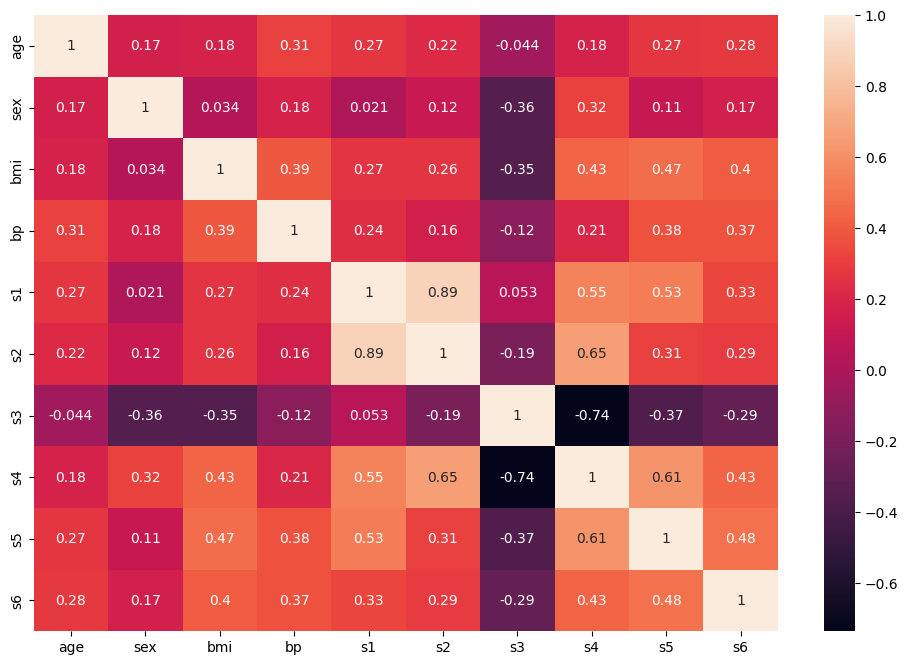

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
## Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

gridCV = GridSearchCV(estimator=regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

import warnings
warnings.filterwarnings('ignore')
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
gridCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [27]:
ypred = gridCV.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'Mean Squared Error: {mean_squared_error(y_test, ypred)}')
print(f'R2 Score: {r2_score(y_test, ypred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ypred)}')


Mean Squared Error: 4313.230712797373
R2 Score: 0.18589898562172957
Mean Absolute Error: 54.877805803585545


[Text(0.6116609263688702, 0.975, 'x[2] <= 0.005\nsquared_error = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.3561909791252485, 0.925, 'x[8] <= 0.006\nsquared_error = 3612.73\nsamples = 209\nvalue = 118.043'),
 Text(0.4839259527470593, 0.95, 'True  '),
 Text(0.19440647779986747, 0.875, 'x[8] <= -0.043\nsquared_error = 2378.339\nsamples = 152\nvalue = 100.559'),
 Text(0.09178263750828364, 0.825, 'x[4] <= -0.039\nsquared_error = 1425.414\nsamples = 49\nvalue = 80.878'),
 Text(0.060304837640821736, 0.775, 'x[4] <= -0.046\nsquared_error = 1663.902\nsamples = 28\nvalue = 94.75'),
 Text(0.030483764082173626, 0.725, 'x[9] <= -0.076\nsquared_error = 1058.16\nsamples = 24\nvalue = 84.083'),
 Text(0.005301524188204109, 0.675, 'x[4] <= -0.082\nsquared_error = 723.5\nsamples = 4\nvalue = 113.0'),
 Text(0.0026507620941020544, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 70.0'),
 Text(0.007952286282306162, 0.625, 'x[2] <= -0.05\nsquared_error = 142.889\nsamples = 3\nvalue = 127.333'),
 T

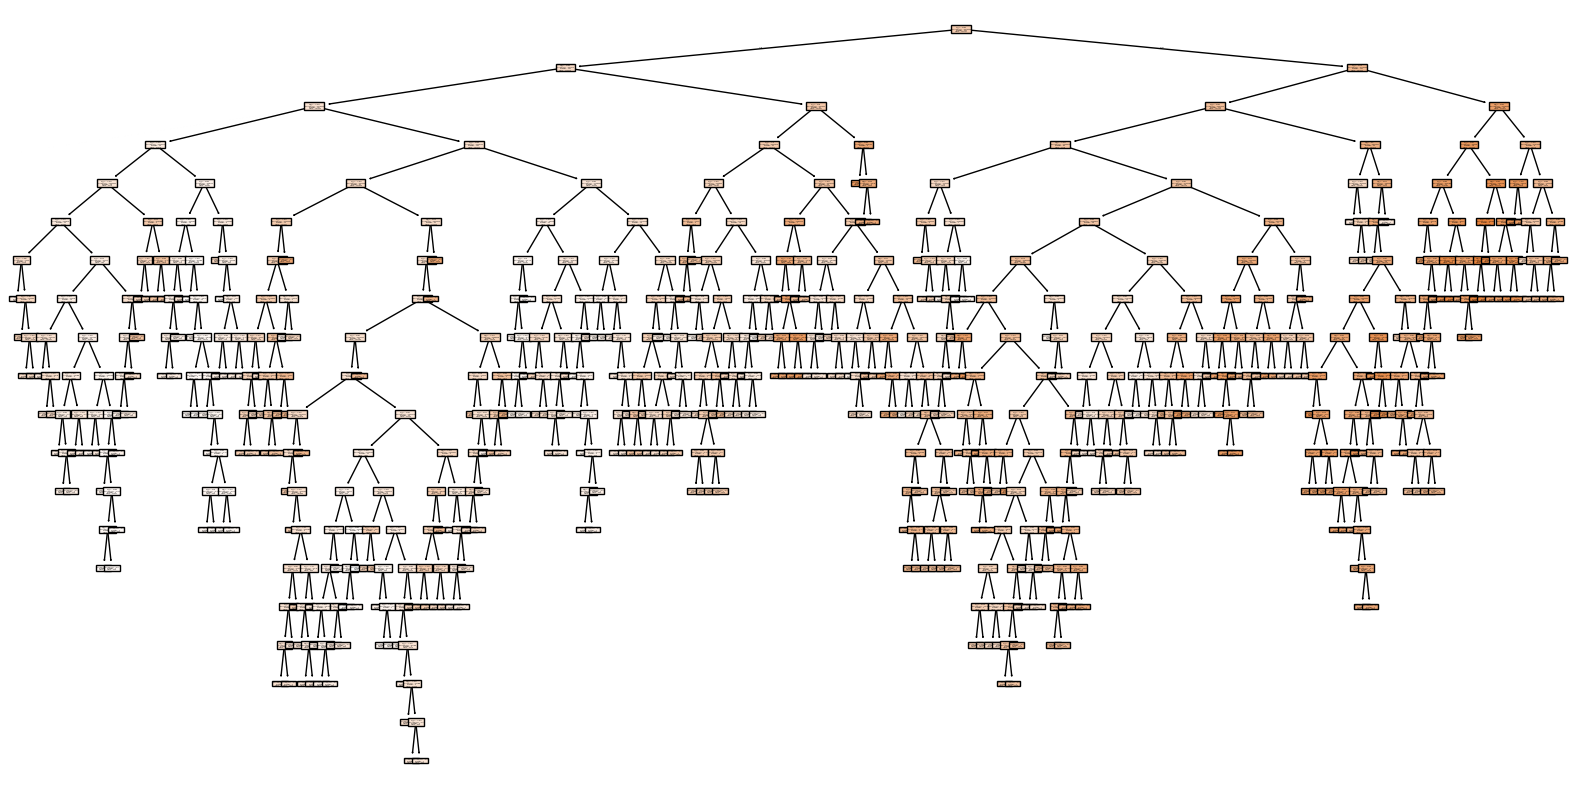

In [29]:
## Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(regressor, filled=True)